In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
X=x_test
Y=y_test

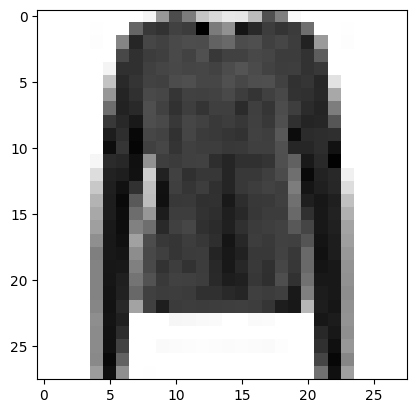

Số này là: 2


In [ ]:
import matplotlib.pyplot as plt
things = x_train[35278]
plt.imshow(things, cmap = plt.cm.binary)
plt.show()
print('Số này là:',y_train[35278])

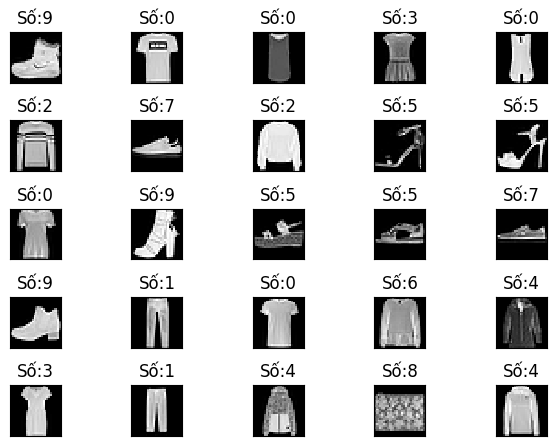

In [ ]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i],cmap='gray',
             interpolation='none')
  plt.title('Số:{}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
x_train = x_train.reshape(60000,28,28)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(10000,28,28)
x_test = x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
from keras.layers.core.activation import Activation
from keras.callbacks import optimizer
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Normalization, LeakyReLU
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape= (28,28,1),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                  

In [ ]:
from keras.losses import categorical_crossentropy
model.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
938/938 [==============================] - 5s 5ms/step - loss: 0.4340 - accuracy: 0.8435
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2726 - accuracy: 0.9005
Epoch 3/20
938/938 [==============================] - 4s 5ms/step - loss: 0.2282 - accuracy: 0.9157
Epoch 4/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1963 - accuracy: 0.9275
Epoch 5/20
938/938 [==============================] - 4s 5ms/step - loss: 0.1736 - accuracy: 0.9352
Epoch 6/20
938/938 [==============================] - 5s 5ms/step - loss: 0.1506 - accuracy: 0.9438
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1293 - accuracy: 0.9512
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1088 - accuracy: 0.9597
Epoch 9/20
938/938 [==============================] - 5s 5ms/step - loss: 0.0943 - accuracy: 0.9636
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.0783 - accuracy: 0.9705

In [ ]:
test = model.evaluate(x_test,y_test,verbose=0)
print('Tess lost:',test[0])
print('Test accuracy:',test[1])

Tess lost: 0.45919671654701233
Test accuracy: 0.9186000227928162


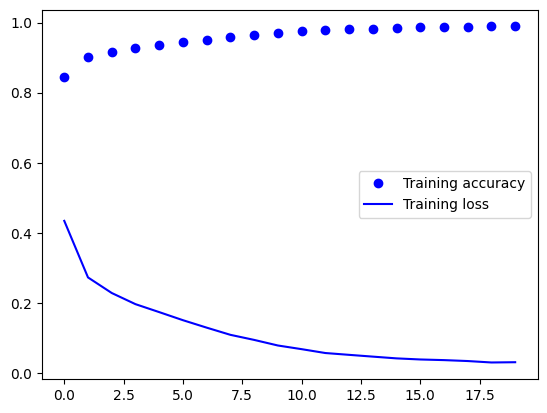

In [ ]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo',label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.legend()
plt.show()